<a href="https://colab.research.google.com/github/himanshivarma/Research-recommendationSYS/blob/main/Recommendation_system.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing the required **libraries**

In [6]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt #for general plotting
import numpy as np # for linear algebra configurations
import os #for accessing of structure of the directory
import pandas as pd #for data processing CSV file input and output  

In [7]:
print(os.listdir('sample_data'))

['anscombe.json', 'README.md', 'mnist_test.csv', 'california_housing_test.csv', 'mnist_train_small.csv', 'california_housing_train.csv']


# Functions for plotting the data

In [8]:
#histogram
def HistPlot(hf,ngramsEachRow,ngramsShown):
    nunique=hf.nunique()
    hf = hf[[col for col in hf if nunique[col] > 1 and nunique[col] < 50]] 
    #display layout in result
    nRow, nCol = hf.shape
    columnNames = list(hf)
    ngramRow = (nCol + ngramsEachRow - 1) / ngramsEachRow
    plt.figure(num=None, figsize=(6*ngramsEachRow, 8*ngramRow), dpi=90, facecolor='r', edgecolor='k')
    for i in range(min(nCol, ngramsShown)):
        plt.subplot(ngramRow, ngramsEachRow, i+1)
        hf.iloc[:,i].hist()
        plt.ylabel('counts')
        plt.xticks(rotation=90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad=1.0, w_pad=1.0, h_pad=1.0)
    plt.show() 

In [20]:
#required matrix
def matrix(hf,width):
  filename=hf.dataframeName
  hf=hf.dropna('columns')#dropping of columns
  hf = hf[[col for col in hf if hf[col].nunique() > 1]]#keeping columns where there are more than one unique values
  if hf.shape[1] < 2:
        print(f'Correlation plots are absent : The no. of constant columns less than two is : ({hf.shape[1]})')
        return
  corr = hf.corr()
  plt.figure(num=None, figsize=(width,width), dpi=80, facecolor='r', edgecolor='b')
  corrMat = plt.matshow(corr, fignum = 1)
  plt.xticks(range(len(corr.columns)), corr.columns, rotation=67)
  plt.yticks(range(len(corr.columns)), corr.columns)
  plt.gca().xaxis.tick_bottom()
  plt.colorbar(corrMat)
  plt.title(f'Correlation Matrix for {filename}', fontsize=15)
  plt.show()

INFORMATION ABOUT DENSITY **PLOTS**

In [23]:
#density plots
def ScatMat(hf,textSize,covinSize):
    hf = hf.select_dtypes(include=[np.number]) # Only numerical columns are resided
    
    hf = hf.dropna('columns')# Remove rows and columns that would lead to hf being singular
    hf = hf[[col for col in hf if hf[col].nunique() > 1]] # keeping columns where there are more than 1 unique values
    columnNames = list(hf)

    if len(columnNames) > 8: # reduce the number of columns
        columnNames = columnNames[:8]#matrix inversion-density plots
    hf = hf[columnNames]
    ax = pd.plotting.scatter_matrix(hf, alpha=0.75, figsize=[covinSize, covinSize], diagonal='hist')
    Scat = hf.mat().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Mat. coef = %.3f' % Scat[i, j], (0.8, 0.2), xycoord='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Density & Scatter Covins')
    plt.show()

In [12]:
nReadrows = 900#initially reading only 900 rows from genome_scores.csv file
hf1 = pd.read_csv('/genome_scores.csv', delimiter=',', nrows = nReadrows)
hf1.dataframeName = 'genome_scores.csv'
nRow,nCol= hf1.shape
#nCol= hf1.shape
print(f'{nRow} rows & {nCol} columns are currently present..')

900 rows & 3 columns are currently present..


# Clean Display of data#####

In [13]:
hf1.head(7)

,movieId,tagId,relevance
0,1,1,0.02500
1,1,2,0.02500
2,1,3,0.05775
3,1,4,0.09675
4,1,5,0.14675
5,1,6,0.21700
6,1,7,0.06700


# **HISTOGRAM**

In [14]:
HistPlot(hf1,8,15)

<Figure size 4320x630 with 0 Axes>

# The CORRELATION Matrix

<ipython-input-20-687c3840ce56>:4: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  hf=hf.dropna('columns')#dropping of columns


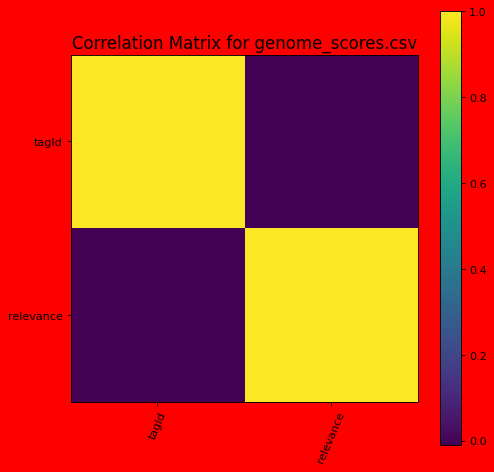

In [21]:
matrix(hf1,7)

<ipython-input-23-51e23b5378b4>:5: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  hf = hf.dropna('columns')# Remove rows and columns that would lead to hf being singular


AttributeError: ignored

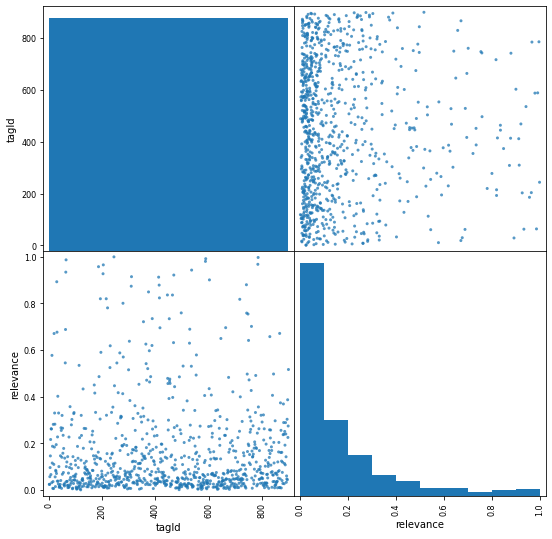

In [25]:
ScatMat(hf1, 15, 9)

**CHECKING 2ND FILE**


In [26]:
nReadrows = 1000 # specify 'None' if want to read whole file
# genome_tags.csv has 1128 rows in reality, but we are only loading/previewing the first 1000 rows
hf2 = pd.read_csv('/genome_tags.csv', delimiter=',', nrows = nReadrows)
hf2.dataframeName = 'genome_tags.csv'
nRow, nCol = hf2.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 1000 rows and 2 columns


In [28]:
hf2.head(7)

,tagId,tag
0,1,007
1,2,007 (series)
2,3,18th century
3,4,1920s
4,5,1930s
5,6,1950s
6,7,1960s


In [29]:
HistPlot(hf2, 5, 15)

<Figure size 2700x576 with 0 Axes>

CHECKING 3RD **FILE**

In [30]:
nReadrows = 1000 # specify 'None' if want to read whole file
# link.csv has 27278 rows in reality, but we are only loading/previewing the first 1000 rows
hf3 = pd.read_csv('/link.csv', delimiter=',', nrows = nReadrows)
hf3.dataframeName = 'link.csv'
nRow, nCol = hf3.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 1000 rows and 3 columns


In [31]:
hf3.head(7)#output of the data

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0
5,6,113277,949.0
6,7,114319,11860.0


In [32]:
HistPlot(hf3, 5, 15)

<Figure size 2700x576 with 0 Axes>

<ipython-input-20-687c3840ce56>:4: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  hf=hf.dropna('columns')#dropping of columns


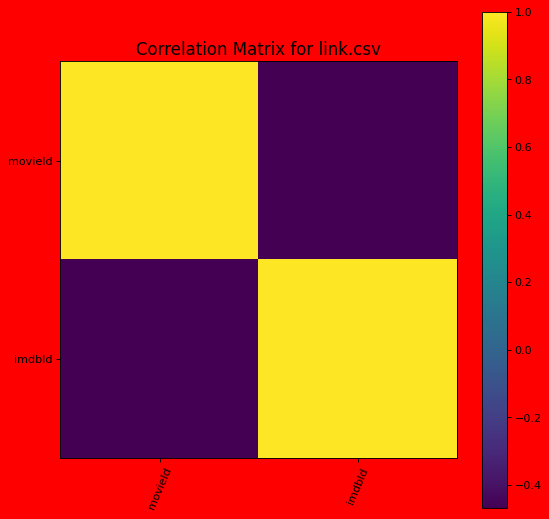

In [34]:
matrix(hf3, 8)

<ipython-input-23-51e23b5378b4>:5: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  hf = hf.dropna('columns')# Remove rows and columns that would lead to hf being singular


AttributeError: ignored

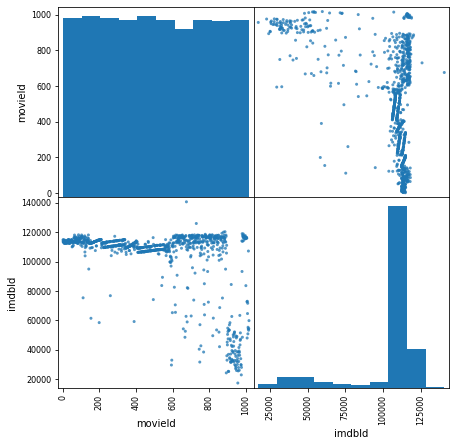

In [35]:
ScatMat(hf3, 10, 7)